In [13]:

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import ticker


In [14]:
# Load the CSV file
file_path_vit = '../splinter_overhead_metrics_vit.csv'
file_path_vgg16 = '../splinter_overhead_metrics_vgg16_exhaustive.csv'
data_vit = pd.read_csv(file_path_vit)
data_vgg16 = pd.read_csv(file_path_vgg16)

In [15]:
# Add a new column 'model' to indicate if the data belongs to VGG16 or ViT
data_vit['model'] = 'ViT'
data_vgg16['model'] = 'VGG16'

# Merge the two dataframes
merged_data = pd.concat([data_vit, data_vgg16], ignore_index=True)

In [16]:
# Set global plot style settings
plt.rcParams['axes.grid'] = False  # Disable grid for all plots
plt.rcParams['axes.facecolor'] = 'white'  # Set background color to white
plt.rcParams['figure.facecolor'] = 'white'  # Set figure background color to white
sns.set_style("white")  # Use Seaborn's white style to remove spines by default
sns.despine()  # Remove all spines globally

<Figure size 640x480 with 0 Axes>

In [17]:
merged_data

,Phase,Duration (ms),CPU Usage (%),Additional RAM Usage (MB),model
0,Pareto Load & Sort,4214.868273,22.1,19.039062,ViT
1,Hardware Configuration Change,468.654208,0.5,0.000000,ViT
2,Hardware Configuration Change,94.317087,0.0,0.000000,ViT
3,Hardware Configuration Change,119.155283,2.1,0.000000,ViT
4,Configuration Retrieval,7.298238,33.3,0.000000,ViT
...,...,...,...,...,...
286,Hardware Configuration Change,132.289656,1.9,0.000000,VGG16
287,Hardware Configuration Change,121.695978,4.1,0.000000,VGG16
288,Hardware Configuration Change,120.812776,4.2,0.000000,VGG16
289,Hardware Configuration Change,124.848753,0.0,0.000000,VGG16


# Configuration Retrieval

C:\Users\danie\AppData\Local\Temp\ipykernel_19512\1873968010.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


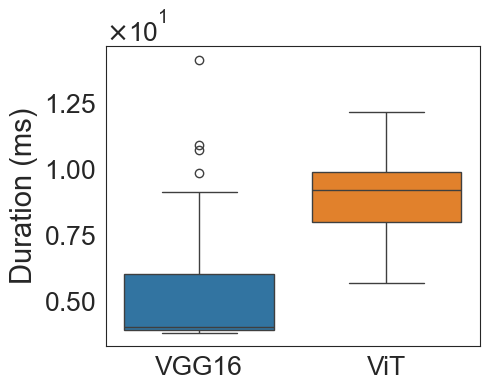

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Filter data for 'Configuration Retrieval' phase
config_retrieval_data = merged_data[merged_data['Phase'] == 'Configuration Retrieval']

# Initialize the plot
fig, ax = plt.subplots(figsize=(5,4))

# Create the boxplot using seaborn
sns.boxplot(
    data=config_retrieval_data, 
    x='model', 
    y='Duration (ms)', 
    palette={'VGG16': 'tab:blue', 'ViT': 'tab:orange'},
    order=['VGG16', 'ViT'],
    ax=ax
)

# Set title and labels with specified font sizes
ax.set_xlabel('', fontsize=label_font_size)
ax.set_ylabel('Duration (ms)', fontsize=label_font_size)

# Adjust tick font sizes
ax.tick_params(axis='both', labelsize=tick_font_size)

# Format y-axis with scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Tight layout and save the figure
fig.tight_layout()
plt.savefig('config_retrieval_overhead.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

# Hardware Setup

C:\Users\danie\AppData\Local\Temp\ipykernel_19512\2207236081.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


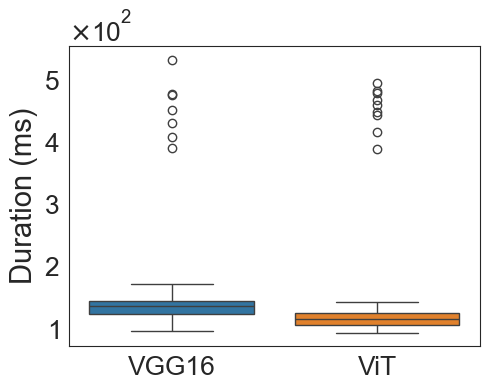

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define font size variables
scale_fonts = 7
label_font_size = 14 + scale_fonts
title_font_size = 16 + scale_fonts
tick_font_size = 12 + scale_fonts
legend_font_size = 12 + scale_fonts
offset_font_size = 12 + scale_fonts

# Filter data for 'Configuration Retrieval' phase
hardware_change_data = merged_data[merged_data['Phase'] == 'Hardware Configuration Change']

# Initialize the plot
fig, ax = plt.subplots(figsize=(5,4))

# Create the boxplot using seaborn
sns.boxplot(
    data=hardware_change_data, 
    x='model', 
    y='Duration (ms)', 
    palette={'VGG16': 'tab:blue', 'ViT': 'tab:orange'},
    order=['VGG16', 'ViT'],
    ax=ax
)

# Set title and labels with specified font sizes
ax.set_xlabel('', fontsize=label_font_size)
ax.set_ylabel('Duration (ms)', fontsize=label_font_size)

# Adjust tick font sizes
ax.tick_params(axis='both', labelsize=tick_font_size)


# Format y-axis with scientific notation
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
ax.ticklabel_format(style='sci', axis='y', scilimits=(0, 0))
ax.yaxis.get_offset_text().set_fontsize(offset_font_size)

# Tight layout and save the figure
fig.tight_layout()
plt.savefig('hardware_change_overhead.pdf', format='pdf', bbox_inches='tight')

# Show the plot
plt.show()

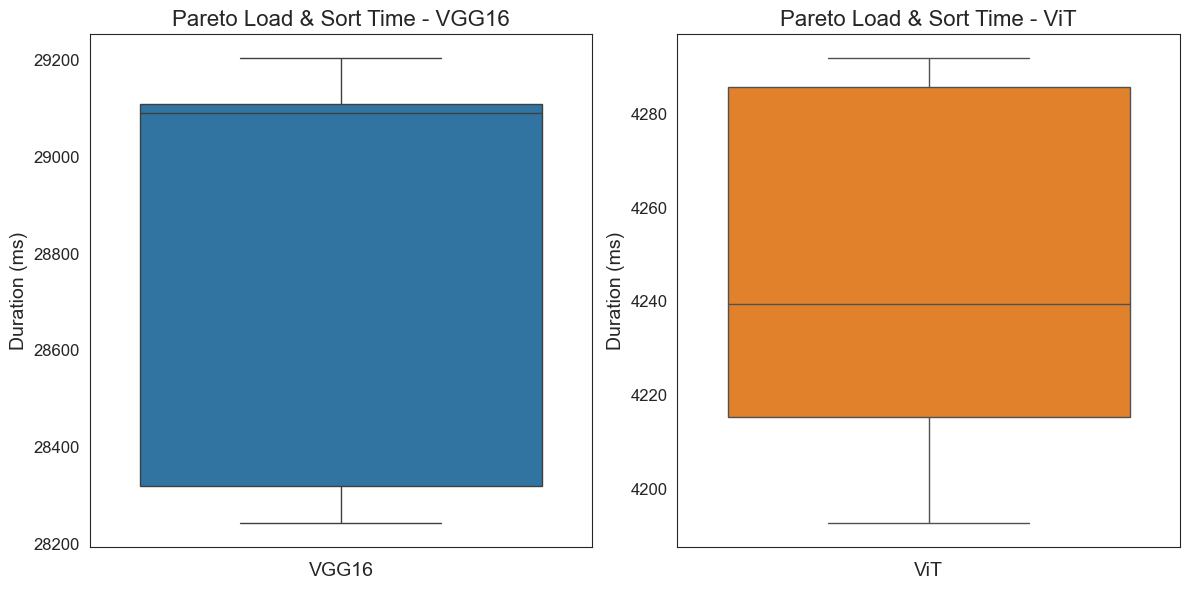

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for 'Pareto Load & Sort' phase
load_sort_data_vgg16 = merged_data[(merged_data['Phase'] == 'Pareto Load & Sort') & (merged_data['model'] == 'VGG16')]
load_sort_data_vit = merged_data[(merged_data['Phase'] == 'Pareto Load & Sort') & (merged_data['model'] == 'ViT')]

# Initialize subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create boxplot for VGG16
sns.boxplot(
    data=load_sort_data_vgg16, 
    y='Duration (ms)', 
    color='tab:blue', 
    ax=ax1
)
ax1.set_title('Pareto Load & Sort Time - VGG16', fontsize=16)
ax1.set_ylabel('Duration (ms)', fontsize=14)
ax1.set_xlabel('VGG16', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

# Create boxplot for ViT
sns.boxplot(
    data=load_sort_data_vit, 
    y='Duration (ms)', 
    color='tab:orange', 
    ax=ax2
)
ax2.set_title('Pareto Load & Sort Time - ViT', fontsize=16)
ax2.set_ylabel('Duration (ms)', fontsize=14)
ax2.set_xlabel('ViT', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)

# Tight layout and save the figure
fig.tight_layout()

# Show the plot
plt.show()


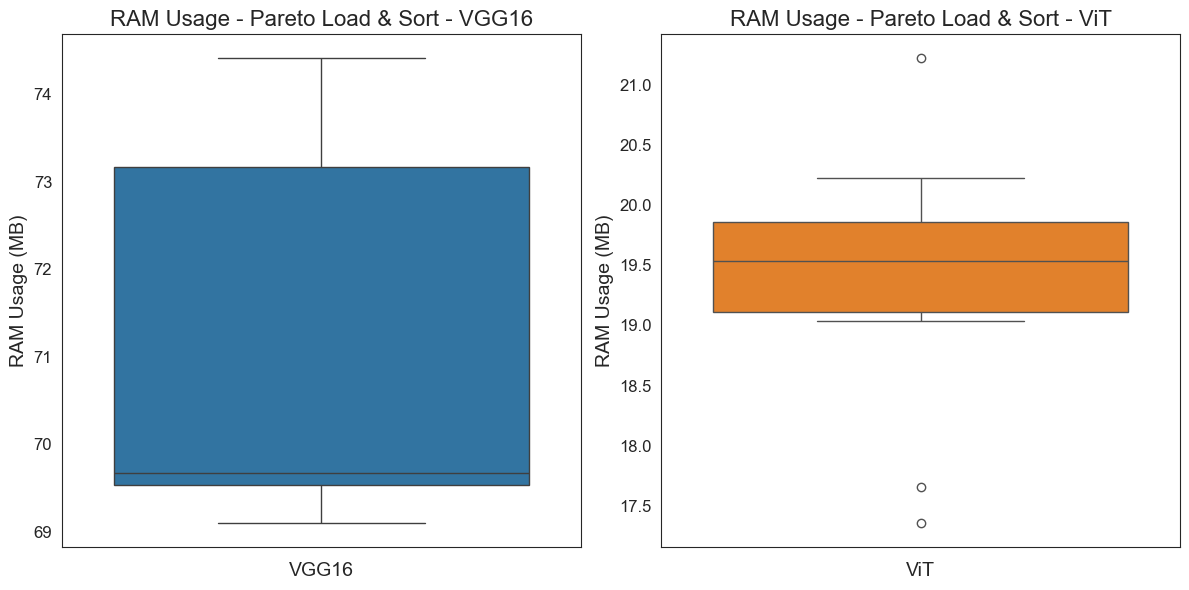

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for 'Pareto Load & Sort' phase RAM usage
ram_usage_vgg16 = merged_data[(merged_data['Phase'] == 'Pareto Load & Sort') & (merged_data['model'] == 'VGG16')]
ram_usage_vit = merged_data[(merged_data['Phase'] == 'Pareto Load & Sort') & (merged_data['model'] == 'ViT')]

# Initialize subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Create boxplot for RAM usage in VGG16
sns.boxplot(
    data=ram_usage_vgg16, 
    y='Additional RAM Usage (MB)',  # Assuming your dataframe has a column for RAM usage
    color='tab:blue', 
    ax=ax1
)
ax1.set_title('RAM Usage - Pareto Load & Sort - VGG16', fontsize=16)
ax1.set_ylabel('RAM Usage (MB)', fontsize=14)
ax1.set_xlabel('VGG16', fontsize=14)
ax1.tick_params(axis='both', labelsize=12)

# Create boxplot for RAM usage in ViT
sns.boxplot(
    data=ram_usage_vit, 
    y='Additional RAM Usage (MB)',  # Assuming your dataframe has a column for RAM usage
    color='tab:orange', 
    ax=ax2
)
ax2.set_title('RAM Usage - Pareto Load & Sort - ViT', fontsize=16)
ax2.set_ylabel('RAM Usage (MB)', fontsize=14)
ax2.set_xlabel('ViT', fontsize=14)
ax2.tick_params(axis='both', labelsize=12)

# Tight layout and save the figure
fig.tight_layout()

# Show the plot
plt.show()


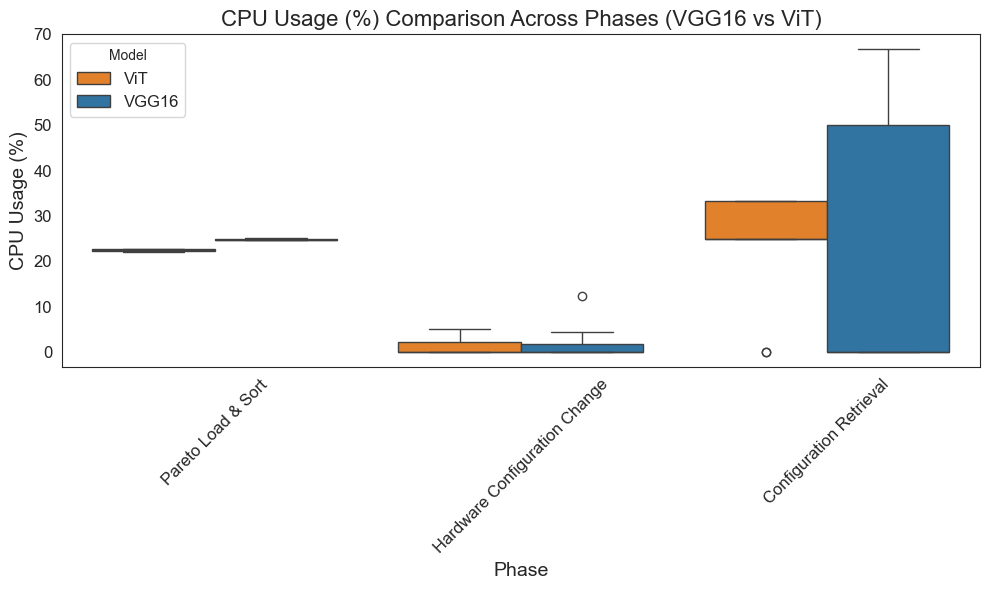

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter data for CPU usage comparison
cpu_usage_data = merged_data[['model', 'Phase', 'CPU Usage (%)']].dropna()

# Initialize the plot
plt.figure(figsize=(10, 6))

# Create the boxplot comparing CPU usage for different models and phases
sns.boxplot(
    data=cpu_usage_data, 
    x='Phase', 
    y='CPU Usage (%)', 
    hue='model', 
    palette={'VGG16': 'tab:blue', 'ViT': 'tab:orange'}
)

# Set title and labels with specified font sizes
plt.title('CPU Usage (%) Comparison Across Phases (VGG16 vs ViT)', fontsize=16)
plt.xlabel('Phase', fontsize=14)
plt.ylabel('CPU Usage (%)', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Model', fontsize=12)

# Tight layout and save the figure
plt.tight_layout()

# Show the plot
plt.show()
